<a href="https://colab.research.google.com/github/newtonis/PASA/blob/master/TP1_PASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! wget "https://raw.githubusercontent.com/newtonis/PASA/master/data/H-H1_LOSC_4_V2-1126259446-32.hdf5"
! wget "https://raw.githubusercontent.com/newtonis/PASA/master/data/L-L1_LOSC_4_V2-1126259446-32.hdf5"
! wget "https://raw.githubusercontent.com/newtonis/PASA/master/readligo.py"



--2019-09-02 14:28:40--  https://raw.githubusercontent.com/newtonis/PASA/master/data/H-H1_LOSC_4_V2-1126259446-32.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1040592 (1016K) [application/octet-stream]
Saving to: ‘H-H1_LOSC_4_V2-1126259446-32.hdf5.2’

H-H1_LOSC_4_V2-1126 100%[===================>]   1016K  --.-KB/s    in 0.08s   

2019-09-02 14:28:40 (13.0 MB/s) - ‘H-H1_LOSC_4_V2-1126259446-32.hdf5.2’ saved [1040592/1040592]

--2019-09-02 14:28:42--  https://raw.githubusercontent.com/newtonis/PASA/master/data/L-L1_LOSC_4_V2-1126259446-32.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connect

windows0 [1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09 1.12625945e+09 1.12625945e+09 1.12625945e+09
 1.12625945e+09

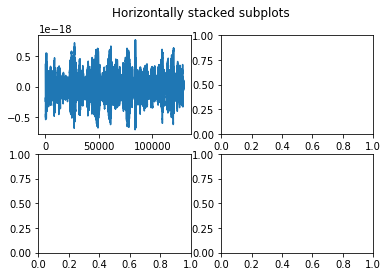

In [0]:
import h5py    
import numpy as np    
import pandas as pd
import readligo as rl
import matplotlib.pyplot as plt

file_name = "H-H1_LOSC_4_V2-1126259446-32.hdf5"  

strain, time, dq = rl.loaddata(file_name, 'H1')

total_time = time[-1]-time[0]
dt = 0.02

windows_qnt = int(total_time/dt)

n = len(time)// windows_qnt

windows = [time[i:i+n] for i in range(windows_qnt)]
stran_windowed = [strain[i:i+n] for i in range(windows_qnt)]

# falta la ultima parte
windows.append(time[(windows_qnt-1)+n:len(time)]) #agrego lo que faltaba
strain_windowed.append(strain[(windows_qnt-1)+n:len(strain)]) #agrego lo que faltaba

fig, axs = plt.subplots(2, 2)
fig.suptitle('Horizontally stacked subplots')

time_t = range(len(windows[0]))

print("windows0",windows[0])
axs[0, 0].plot(range(len(strain_windowed[0])),strain_windowed[0])
#axs[1, 0].plot(range(len(windows[1])),strain_windowed[1])

# normalizo la fft
Y = np.fft.fft(strain_i)
Y /= len(Y)

Mod = [abs(x)**2 for x in Y];

#axs[1,1].plot(range(len(Mod)),Mod) # plotting the spectrum

plt.show()
